<a href="https://colab.research.google.com/github/jidemaestri/Financial-Markets/blob/master/04_Markowitz_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


In [148]:
tickers = ["AAPL", "MSFT", "VALE", "MELI", "KO", "MCD", "NVDA", "PAM", "GGAL", "JPM", "TSM", "SPY", "QQQ", "DIA"]


#### Scrapping data

In [149]:
data = yf.download(tickers, start="2009-01-01", end="2023-01-26")


[*********************100%***********************]  14 of 14 completed


In [150]:
data["Adj Close"].head()


,AAPL,DIA,GGAL,JPM,KO,MCD,MELI,MSFT,NVDA,PAM,QQQ,SPY,TSM,VALE
Date,,,,,,,,,,,,,,
2009-01-02 00:00:00-05:00,2.762747,65.266014,2.157685,22.201176,14.837949,42.632061,17.034985,15.200127,1.998406,NaN,27.302021,70.913742,5.121135,6.680701
2009-01-05 00:00:00-05:00,2.879345,64.904274,2.157685,20.714016,14.689242,42.504990,18.188082,15.342188,2.035116,NaN,27.293215,70.829819,5.021454,7.141613
2009-01-06 00:00:00-05:00,2.831854,65.229828,2.050692,21.160164,14.453258,41.555389,17.897388,15.521623,2.103947,NaN,27.565969,71.302795,5.233277,7.653177
2009-01-07 00:00:00-05:00,2.770663,63.572872,1.916951,19.892544,14.524376,40.953518,16.569860,14.587036,1.977756,NaN,26.782896,69.166862,4.803401,6.928884
2009-01-08 00:00:00-05:00,2.822112,63.261742,1.934783,19.276428,14.624588,40.472042,16.472961,15.043114,1.927280,NaN,27.064451,69.449081,4.697490,7.116288


#### Calculating daily returns

In [151]:
returns = data["Adj Close"].pct_change().dropna()


In [152]:
returns_pct = returns.mul(100)


In [153]:
returns_pct.tail()



,AAPL,DIA,GGAL,JPM,KO,MCD,MELI,MSFT,NVDA,PAM,QQQ,SPY,TSM,VALE
Date,,,,,,,,,,,,,,
2023-01-19 00:00:00-05:00,0.044374,-0.702764,3.951619,-1.332655,-0.150477,-0.924681,0.357365,-1.645395,-3.521903,-0.815700,-0.982442,-0.727982,-1.195931,0.110806
2023-01-20 00:00:00-05:00,1.922075,1.004997,6.671836,0.244899,0.602814,1.896957,2.363105,3.574358,6.406207,4.173009,2.736689,1.862904,2.975110,0.276708
2023-01-23 00:00:00-05:00,2.350044,0.749243,-1.236364,1.621263,0.249663,0.264361,-0.281395,0.982433,7.590108,0.029235,2.221593,1.199859,5.086241,0.055178
2023-01-24 00:00:00-05:00,1.006306,0.276644,-0.368190,0.859614,0.531296,0.100260,1.361647,-0.222610,0.375137,0.350783,-0.204179,-0.107329,-1.149912,2.151138
2023-01-25 00:00:00-05:00,-0.470075,0.065263,3.843315,0.483928,0.627582,1.276155,1.867717,-0.590808,0.301065,2.942028,-0.221932,0.037480,-2.273682,2.105828


##### Mean returns & Variance

In [154]:
mean_returns = np.mean(returns_pct)


In [155]:
var_returns = np.var(returns_pct)

In [156]:
mean_returns

AAPL    0.111956
DIA     0.051558
GGAL    0.095397
JPM     0.059486
KO      0.042298
MCD     0.065322
MELI    0.145532
MSFT    0.088550
NVDA    0.161614
PAM     0.080911
QQQ     0.069464
SPY     0.053107
TSM     0.095720
VALE    0.052827
dtype: float64

In [157]:
df_portfolio = pd.DataFrame({'daily_mean':mean_returns, 'daily_var':var_returns})


In [158]:
df_portfolio

,daily_mean,daily_var
AAPL,0.111956,3.263093
DIA,0.051558,1.162134
GGAL,0.095397,11.952995
JPM,0.059486,3.225651
KO,0.042298,1.212458
MCD,0.065322,1.417541
MELI,0.145532,9.300263
MSFT,0.088550,2.669177
NVDA,0.161614,7.939303
PAM,0.080911,9.501375


In [159]:
returns_yr = returns.mean()*250

In [160]:
returns_yr

AAPL    0.279890
DIA     0.128894
GGAL    0.238493
JPM     0.148715
KO      0.105745
MCD     0.163305
MELI    0.363830
MSFT    0.221375
NVDA    0.404035
PAM     0.202278
QQQ     0.173660
SPY     0.132767
TSM     0.239301
VALE    0.132068
dtype: float64

In [161]:
cov_daily = returns.cov()


In [162]:
cov_annual = cov_daily * 250


#### Creating lists for data storing

In [163]:
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

In [164]:
num_tickers = len(tickers)

In [165]:
num_port = 40000

In [166]:
risk_free_rate = 3/100

#### Efficient Frontier

In [167]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_port):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_yr)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility - risk_free_rate
    sharpe_ratio.append(sharpe)    
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)


In [168]:

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio
             }


In [169]:

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(tickers):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]


In [170]:

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in tickers]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,VALE weight,MELI weight,KO weight,MCD weight,NVDA weight,PAM weight,GGAL weight,JPM weight,TSM weight,SPY weight,QQQ weight,DIA weight
0,0.210424,0.210377,0.970227,0.118963,0.045939,0.061688,0.038202,0.114460,0.065129,0.047558,0.067533,0.100132,0.007149,0.111798,0.069947,0.048564,0.102939
1,0.226327,0.235210,0.932237,0.088969,0.033927,0.118490,0.107169,0.133545,0.015968,0.026853,0.016026,0.152117,0.145658,0.063127,0.006900,0.074188,0.017063
2,0.214999,0.226871,0.917674,0.014517,0.059928,0.131675,0.143272,0.050356,0.064320,0.045150,0.101816,0.131733,0.065339,0.082044,0.092670,0.004149,0.013032
3,0.225511,0.213764,1.024952,0.072760,0.070178,0.047735,0.047369,0.087119,0.068753,0.080341,0.101052,0.131068,0.066298,0.095710,0.067033,0.048615,0.015968
4,0.211656,0.208829,0.983537,0.080491,0.012155,0.031883,0.009342,0.022948,0.177485,0.117901,0.096731,0.037373,0.059070,0.123492,0.112667,0.034961,0.083499


#### Plots & Results

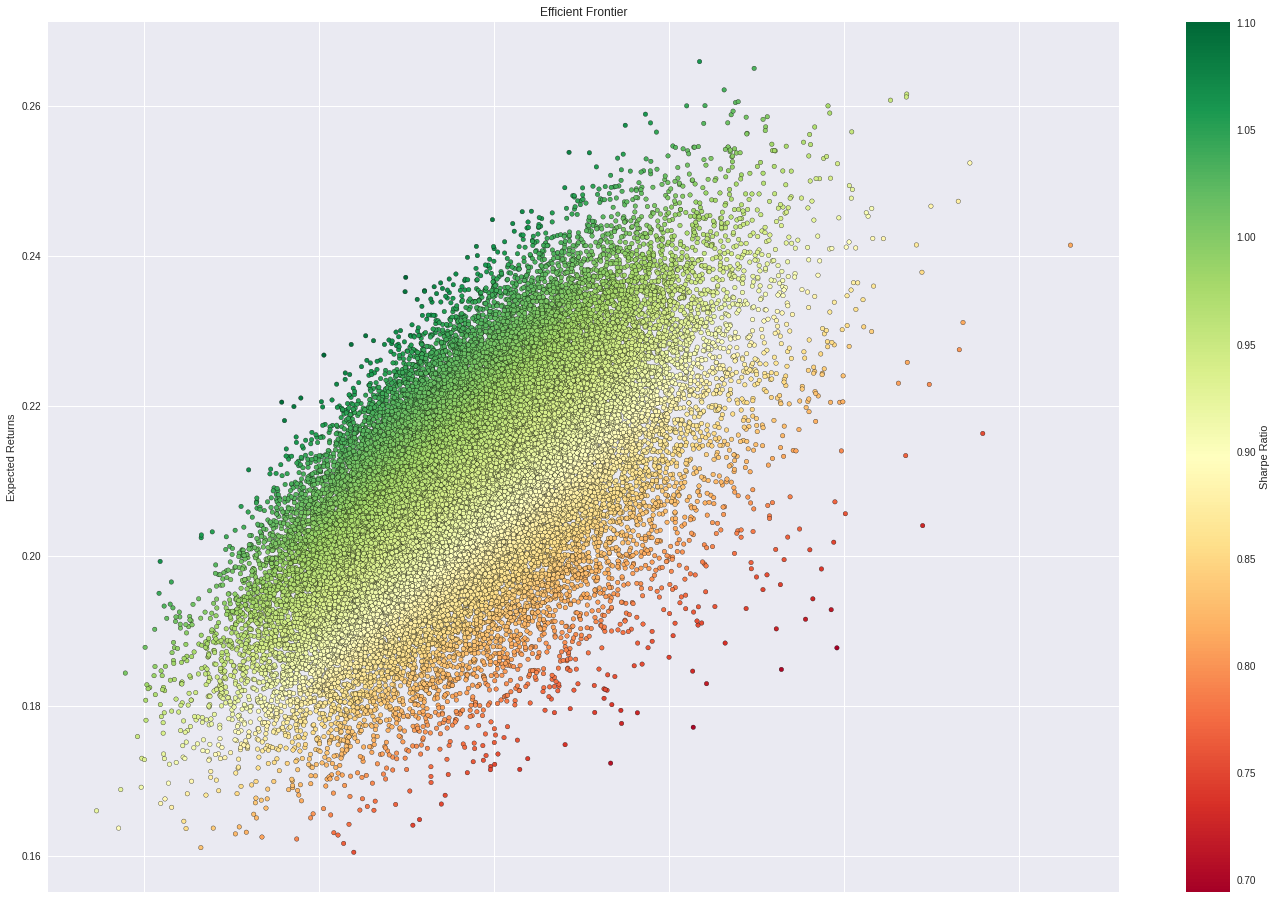

In [177]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(24, 16), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [172]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

In [173]:
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

In [174]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,VALE weight,MELI weight,KO weight,MCD weight,NVDA weight,PAM weight,GGAL weight,JPM weight,TSM weight,SPY weight,QQQ weight,DIA weight
19188,0.226747,0.20057,1.100516,0.167056,0.021441,0.002137,0.055423,0.150496,0.150887,0.083897,0.114731,0.108917,0.023713,0.073774,0.00199,0.038271,0.007266


In [175]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,VALE weight,MELI weight,KO weight,MCD weight,NVDA weight,PAM weight,GGAL weight,JPM weight,TSM weight,SPY weight,QQQ weight,DIA weight
18179,0.166023,0.174592,0.920919,0.056858,0.076074,0.059528,0.059744,0.1893,0.182951,0.000337,0.003721,0.013256,0.061593,0.096278,0.136381,0.049333,0.014645


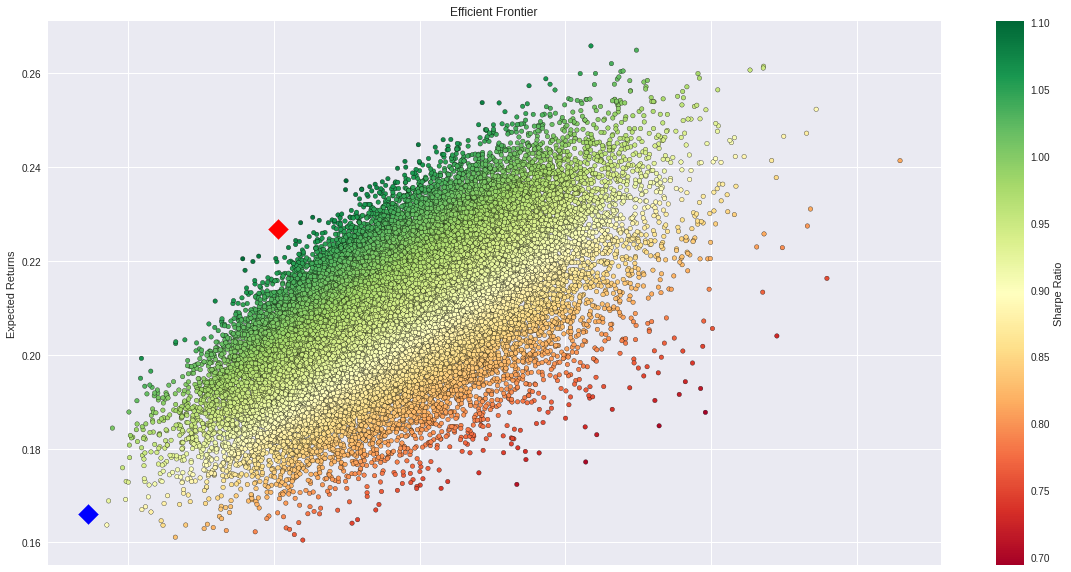

In [178]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(20, 10), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()